The notebook is clear and organized and easy to follow. I would recommend using a heatmap which can show the correlation to BeatsPerMinutes to help see the strongest predictors for your final model. Possibly add more headings and descriptions.

In [1]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/test-and-training-data/train.csv")

In [3]:
df.head()


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
# Check correlations with the target
correlations = df.corr()['BeatsPerMinute'].sort_values(ascending=False)
print(correlations)

BeatsPerMinute               1.000000
MoodScore                    0.007059
TrackDurationMs              0.006637
RhythmScore                  0.005440
VocalContent                 0.004876
LivePerformanceLikelihood    0.003471
InstrumentalScore            0.001900
id                          -0.000355
AcousticQuality             -0.000820
AudioLoudness               -0.003327
Energy                      -0.004375
Name: BeatsPerMinute, dtype: float64


In [5]:
# Features and target 
# Drop target + id column right away
X_raw = df.drop(columns=['BeatsPerMinute', 'id','Energy','AudioLoudness','AcousticQuality','InstrumentalScore','LivePerformanceLikelihood'])
y = df['BeatsPerMinute']

In [6]:
print (y.describe())

count    524164.000000
mean        119.034899
std          26.468077
min          46.718000
25%         101.070410
50%         118.747660
75%         136.686590
max         206.037000
Name: BeatsPerMinute, dtype: float64


In [7]:
print (X_raw.shape)

(524164, 4)


In [8]:
#Drop low-variance features
selector = VarianceThreshold(threshold=0.01)
X_filtered = pd.DataFrame(
    selector.fit_transform(X_raw),
    columns=X_raw.columns[selector.get_support()]
)

In [9]:
print (X_filtered.shape)

(524164, 3)


In [10]:
X_raw['TrackDurationMs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 524164 entries, 0 to 524163
Series name: TrackDurationMs
Non-Null Count   Dtype  
--------------   -----  
524164 non-null  float64
dtypes: float64(1)
memory usage: 4.0 MB


In [11]:
X_raw['TrackDurationMs'].describe()

count    524164.000000
mean     241903.692949
std       59326.601501
min       63973.000000
25%      207099.876625
50%      243684.058150
75%      281851.658500
max      464723.228100
Name: TrackDurationMs, dtype: float64

In [12]:
# Feature engineering: Convert TrackDurationMs from milliseconds to seconds
if 'TrackDurationMs' in X_filtered.columns:
    X_filtered['TrackDurationMs'] = X_filtered['TrackDurationMs'] / 1000.0


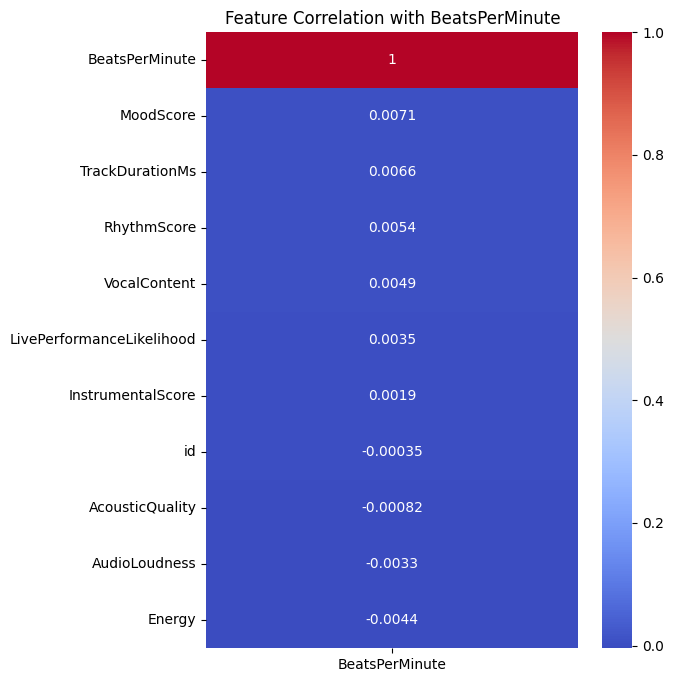

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(6,8))
sns.heatmap(corr[['BeatsPerMinute']].sort_values(by='BeatsPerMinute', ascending=False),
            cmap="coolwarm", annot=True)
plt.title("Feature Correlation with BeatsPerMinute")
plt.show()



In [14]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42
)

In [15]:
print (X_val.shape)
print (X_val.head)

(104833, 3)
<bound method NDFrame.head of         RhythmScore  MoodScore  TrackDurationMs
33141      0.451778   0.655023       209.921892
78954      0.646031   0.396523       217.672560
162663     0.766942   0.371289       200.367760
243122     0.452465   0.492793       346.616751
278030     0.710611   0.828207       331.810791
...             ...        ...              ...
490497     0.641498   0.582481       102.642718
1772       0.838005   0.671080       244.919182
269444     0.711387   0.716263       233.115198
324895     0.318021   0.854191       288.884626
92899      0.621913   0.519961       292.762621

[104833 rows x 3 columns]>


In [16]:
print (X_train.shape)
print (X_train.head)
print(X_train.columns)

(419331, 3)
<bound method NDFrame.head of         RhythmScore  MoodScore  TrackDurationMs
129122     0.781405   0.682512       241.538257
493077     0.532378   0.483868       180.583742
457814     0.912855   0.440126       291.223470
411024     0.471765   0.485008       313.870057
397112     0.975000   0.682415       243.435641
...             ...        ...              ...
259178     0.683068   0.734752       223.320039
365838     0.723214   0.929107       316.878030
131932     0.553987   0.534394       235.567531
146867     0.975000   0.959661       264.160716
121958     0.563534   0.372578       299.297976

[419331 rows x 3 columns]>
Index(['RhythmScore', 'MoodScore', 'TrackDurationMs'], dtype='object')


In [17]:
print (y_val.shape)
print (y_val.head)

(104833,)
<bound method NDFrame.head of 33141      65.19365
78954      87.33085
162663     88.85002
243122    159.29379
278030    143.66694
            ...    
490497    125.75619
1772      142.94391
269444    100.04995
324895    118.65849
92899      64.15774
Name: BeatsPerMinute, Length: 104833, dtype: float64>


In [18]:
# Linear Regression 
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_val)
mse_lin = mean_squared_error(y_val, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("Linear Regression MSE:", mse_lin)
print("Linear Regression RMSE:", rmse_lin)


Linear Regression MSE: 699.2652677523405
Linear Regression RMSE: 26.44362433087304


In [19]:
# Ridge Regression 
ridge = make_pipeline(StandardScaler(), Ridge(alpha=10))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 699.2652678688843


In [20]:
# Random Forest 
rf = RandomForestRegressor(
    n_estimators=300, max_depth=20, max_features='sqrt',
    random_state=42, n_jobs=2
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Random Forest MSE:", mse_rf)

Random Forest MSE: 699.8039325889965


In [21]:
# Gradient Boosting 
gb = GradientBoostingRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
mse_gb = mean_squared_error(y_val, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)

Gradient Boosting MSE: 699.6424649296146


In [22]:
# Baseline (mean predictor) 
baseline_pred = np.full_like(y_val, y_train.mean())
mse_baseline = mean_squared_error(y_val, baseline_pred)
print("Baseline MSE:", mse_baseline)

Baseline MSE: 699.3569121942867


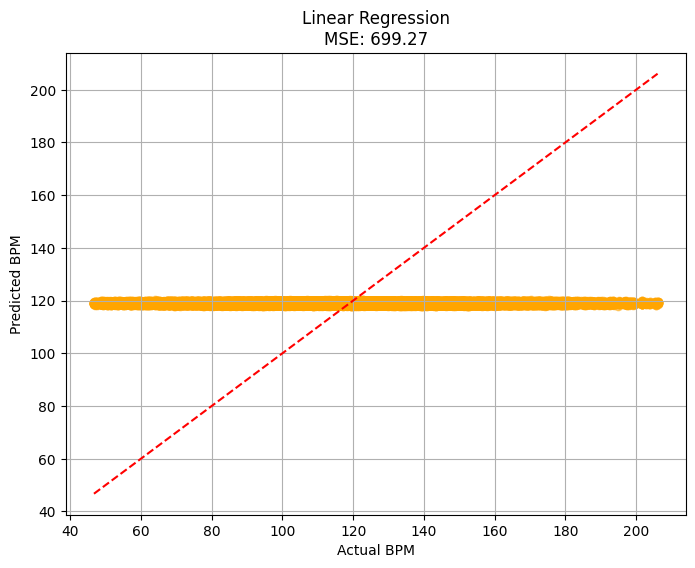

In [23]:
# Linear Regression Plot with MSE and RMSE
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_lin, alpha=0.5, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Linear Regression\nMSE: {mse_lin:.2f}")
plt.grid(True)
plt.show()


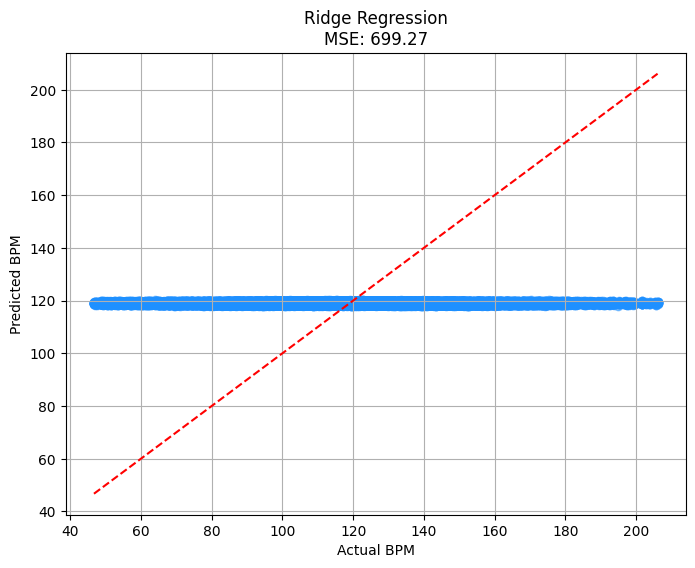

In [24]:
# Ridge Regression Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_ridge, alpha=0.5, color='dodgerblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Ridge Regression\nMSE: {mse_ridge:.2f}")
plt.grid(True)
plt.show()

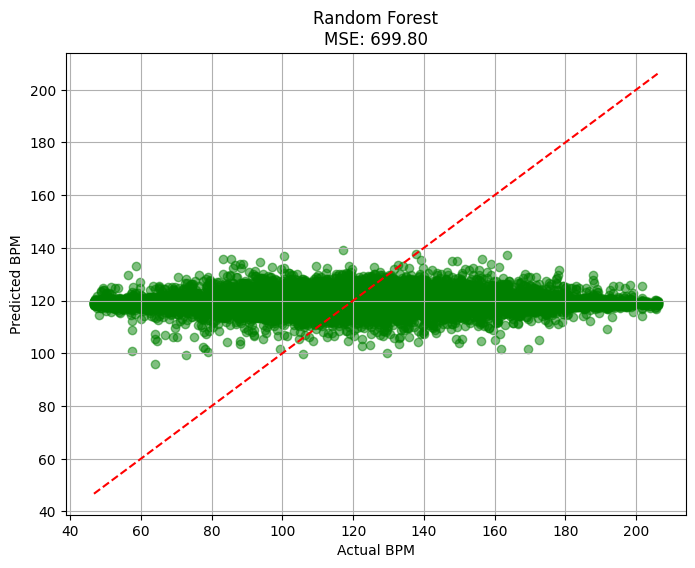

In [25]:
# Random Forest Plot
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Random Forest\nMSE: {mse_rf:.2f}")
plt.grid(True)
plt.show()

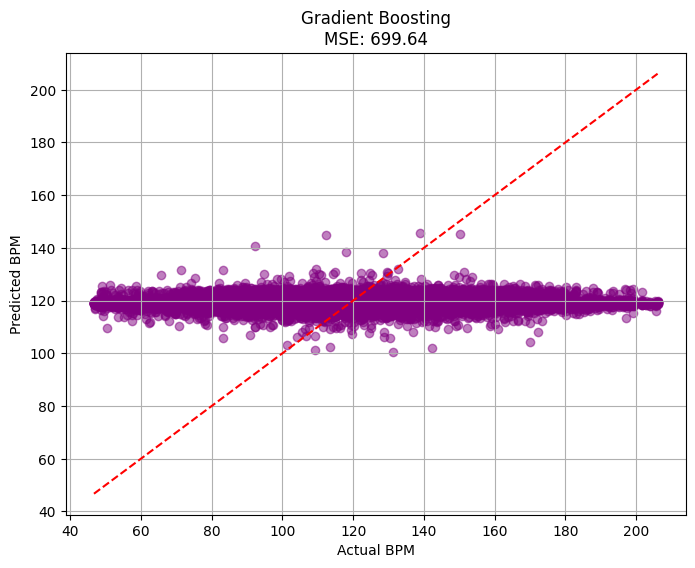

In [26]:
# Gradient Boosting Plot
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_gb, alpha=0.5, color='purple')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Gradient Boosting\nMSE: {mse_gb:.2f}")
plt.grid(True)
plt.show()